# Atividade Extra 02
## Segmentar e fazer perspectiva de imagem
## usem em várias aplicações, como realidade aumentada

Veja links relacionados:

* http://eduardohenriquearnold.github.io/tdcfloripa/#1
* https://pt-br.eventials.com/Globalcode/visao-computacional-com-python-e-opencv/
* http://opencvpython.blogspot.com.br/2012/06/sudoku-solver-part-2.html
* http://stackoverflow.com/questions/10196198/how-to-remove-convexity-defects-in-a-sudoku-square
* http://www.shogun-toolbox.org/static/notebook/current/Sudoku_recognizer.html
* http://arnab.org/blog/so-i-suck-24-automating-card-games-using-opencv-and-python
* https://pythontips.com/2015/03/11/a-guide-to-finding-books-in-images-using-python-and-opencv/

TypeError: ignored

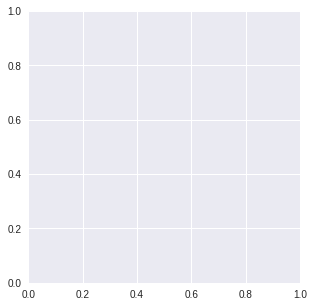

In [2]:
# para capturar uma imagem da câmera
if True: # mude para True
    cam = cv2.VideoCapture(0)   # 0 -> index of camera
    s, img = cam.read()
    cv2.imwrite("extra02filename.jpg",img) #save image
    plt.figure(figsize=(5,5))
    showfig(img,"gray") 

In [0]:
def showfig(image, ucmap):
    imgplot=plt.imshow(image, ucmap)
# comentar esta linha para rodar do shell
get_ipython().magic(u'matplotlib inline')

import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [0]:
if True: # mude para True
    cam.release() # fechar a câmera

## Ler um arquivo contendo uma imagem

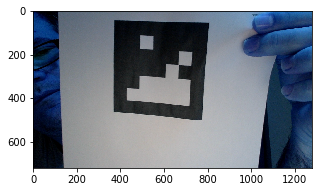

In [0]:
img = cv2.imread("extra02filename.jpg")
plt.figure(figsize=(5,5))
showfig(img,"gray")  

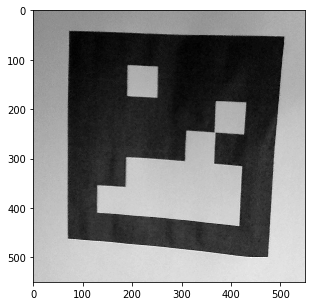

In [0]:
gray = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY) # converte para grayscale
gray = gray[0:550,300:850] # recorta imagem
plt.figure(figsize=(5,5))
showfig(gray,"gray") 

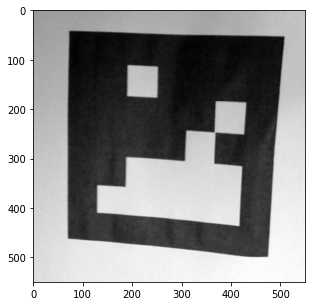

In [0]:
img = cv2.GaussianBlur(gray, (5,5), 0) # filtro passa baixa - para borrar imagem
plt.figure(figsize=(5,5))
showfig(img,"gray") 

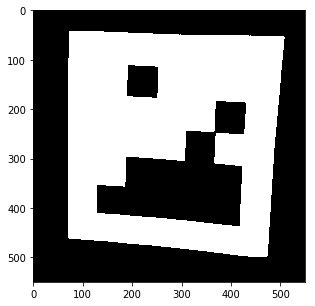

In [0]:
ret3,th3 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
th3 = 255 - th3
plt.figure(figsize=(5,5))
showfig(th3,"gray") 

In [0]:
# lista de objetos conexos
_, contours, _ = cv2.findContours(th3, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [0]:
candidate = []
areaMax = 0
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.1*perimeter, True)
    if len(approx) == 4: # pego apenas os objetos com 4 lados
        approx = np.array(approx, dtype='float32').reshape(4,2)
        if (areaMax < cv2.contourArea(contour)): # acha a maior área
            areaMax = cv2.contourArea(contour)
            candidate = approx

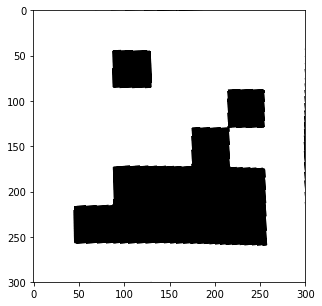

In [0]:
h, w = [300,300]
#dst = np.array([[0,0],[width-1,0],[width-1,height-1],[0, height-1]],dtype='float32')
pts1 = np.float32([candidate[0],candidate[3],candidate[1],candidate[2]])
pts2 = np.float32([[0,0],[w,0],[0,h],[w,h]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(th3,M,(w,h))

plt.figure(figsize=(5,5))
showfig(dst,"gray")

# Parte 1: Implemente abaixo a sua solução para transformar esta imagem em uma matriz 7x7, com zeros (preto) e uns (branco)


# Parte 2 (opcional): Colocar uma outra imagem na máscara em um vídeo, em tempo real 